# ADN

## Ejersicio:

Debido a la gran cantidad de crímenes y casos sin resolver, la policía local ha decidido implementar su propio sistema de reconocimiento de sospechosos con la técnica basada en el uso del DNA.

Para esto la policía mantiene dos listas de información; la primera contiene el nombre de las personas registradas en la región (nombre y apellido), la otra, un cromosoma representativo del DNA de cada una de esas personas.

Por simplicidad, un cromosoma se considera como una cadena de 0 (ceros) y 1 (unos), de largo 20.

El método para determinar el sospechoso, es el siguiente:

*    Se obtiene una muestra del cromosoma del autor del delito (20 caracteres)

*    Se busca en la lista de cromosomas, aquel cromosoma que es más parecido a la muestra. El más parecido se define como el cromosoma que tiene más genes (caracteres) iguales a la muestra.

*    Al terminar la búsqueda, se muestra el nombre de la persona cuyo cromosoma es sospechoso, con el porcentaje de parentesco.

La informacíon inicial del programa se debe ingresar directamente en el código, es decir, nombres y cromosomas, en cambio la secuencia encontrda en la escena del crimen, debe ser ingresada por el usuario.

Desarrolle un programa que lleve a cabo la búsqueda descrita a partir de una muestra de entrada.

Recuerde que como se trata de dos listas, la información del nombre como la de los cromosomas, deben estar en la misma posición en ambas listas.

Consideremos, personas como Pedro, Juan y Diego. Sus secuencias serán

*    00000101010101010101
*    00101010101101110111
*    00100010010000001001

Ingrese secuencia: 01010101000011001100

El culpable es Pedro con un parentezco de 60%

link: http://progra.usm.cl/apunte/ejercicios/2/adn.html

## Solucion

### importacion de librerias

In [ ]:
import pandas as pd
import seaborn as sns

### Creacion de DataFrame

In [71]:
# Se crea lista con los nombres y sus respectivos codigos de ADN
nombres = ['Pedro', 'Juan', 'Diego']
adn = ['00000101010101010101', '00101010101101110111', '00100010010000001001']

In [72]:
#Se almacena la lista en una serie de pandas
ciudadanos = pd.Series(adn, index= nombres)

### Conteo de considencias

In [73]:
# se almacena una cadena numerica relacionada al ADN
dna = str(input('Ingrese el DNA: '))

In [62]:
# Funcion que cuenta la cantidad de considencias
#Solucion obtenida de: https://gist.github.com/Fhernd/f6c11fc2c970ffe44ffc2cb261bb6ec1
from collections import Counter

def caracteres_comunes(cadena_1, cadena_2):
    contador_1 = Counter(cadena_1)
    contador_2 = Counter(cadena_2)
    comunes = contador_1 & contador_2
    comunes = list(comunes.elements())
    comunes = sorted(comunes)
    
    return len(comunes)

In [80]:
#Se inicializan las listas que se utilizaran para almacenar el adn ingresado y cada uno de los adn previamente almacenados
i = []
j = []

# En cada iteracion se pasa a la funcion el codigo de adn ingresado por teclado y se recorre uno de los adn registrados
for adn in ciudadanos.values:
    i.append(adn)
    j.append(caracteres_comunes(dna, adn))

culpables = pd.Series(i, index= j)

#Obtener el maximo culpable
culpable = ciudadanos.loc[ciudadanos.values == max(culpables.values)]
#Se obtiene el adn del culpable
culpable = culpable.index

#Obtener la relacion de considencia de adn del culpable
porcentaje_considencia = ( max(culpables.index)  * 100 ) // 20

In [ ]:
#Se verifica que el porcentaje de considencia sea mayor al 60%

if porcentaje_considencia > 60:
    print('El culpable es ', culpable[0])
    print('El porcentaje de relacion del ADN es de', porcentaje_considencia)
else:
    print('Es DNA no esta registrado')

### Grafico de porcentaje de considencia de ADN

In [82]:
#Se agregan a una nueva serie los usuarios con porsentaje de considencia superior al 50%

p_culpables = pd.DataFrame()
p_culpables['Nombre'] = ciudadanos.index
p_culpables['ADN'] = ciudadanos.values
p_culpables['Porcentaje'] = culpables.loc[culpables.values == ciudadanos.values].index * 100 / 20

In [83]:
#Se dejan solo aquellos registros donde el porcentaje de considencia es igual o superior al 60%

p_culpables = p_culpables.loc[p_culpables.Porcentaje >= 60]

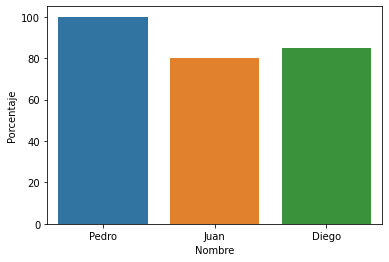

In [ ]:
#Se grafica los sospechozos y la probabilidad de considencia (si esta es mayor al 60%)
sns.barplot(data = p_culpables, x= 'Nombre', y='Porcentaje');